<a href="https://colab.research.google.com/github/imshubhadeep/TSF-GRIP-NOV-2021-Internship-Tasks/blob/main/Predicton_with_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - GRIP - Data Science and Business Analytics - NOV 2021**

**Task:** 

*   Predict the percentage of a student based on the no. of study hours.
*   What will be predicted score if a student studies for 9.25 hrs/ day?


***Author : Shubhadeep Chowdhury.***


In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Load Dataset
url = "http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data Imported Successfully")
df.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Now for next process we need to check how many rows, columns and is there any null value in our dataset 
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**VISUALIZE THE DATA**

Now we will plot our dataset in a 2-D graph format.

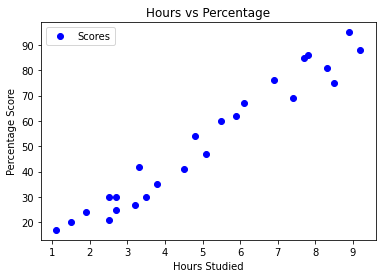

In [5]:
# Using matplotlib libray we're going to visualize the data.
df.plot(x='Hours', y='Scores', style='bo')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

**PREPARE THE DATA**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
X = df.iloc[:,:-1].values
Y = df.iloc[:, 1].values

In [8]:
# Spliting dataset into training_data and testing_data using Scikit-Learn's built-in train_test_split() method. 

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10) #random_state is for getting constant value everytime.

**BUILDING MODEL**

Now we build our machine learning model

In [9]:
from sklearn.linear_model import LinearRegression
train_model = LinearRegression()  
train_model.fit(x_train, y_train) 

print("Training complete.")

Training complete.


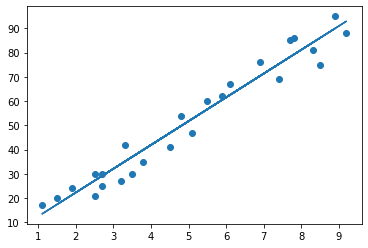

In [10]:
# Plotting the regression line
line = train_model.coef_*X+train_model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

**MAKING PREDICTION**

Here we making prediction of our model.

In [11]:
print(x_test) # Testing data - In Hours
y_pred = train_model.predict(x_test) # Predicting the scores

[[1.5]
 [5.1]
 [3.3]
 [3.2]
 [4.5]]


In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  # view actual and predicted on test set side-by-side
df

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


In [13]:
# Now it's time to test our own data.
# Predict percent for custom input value for hours
# Q. What will be predicted score if a student studies for 9.25 hrs/ day?

hours = [[9.25]]
own_predict = train_model.predict(hours)
print('Our prediction:-')
print('A student who studies', hours[0][0], 'hours is estimated to score', own_predict[0])

Our prediction:-
A student who studies 9.25 hours is estimated to score 93.43229053722453
